# Boston House Pricing Prediction

In [1]:
import matplotlib.pyplot as plt
from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Integer, Categorical, Continuous
from sklearn_genetic.plots import plot_fitness_evolution, plot_search_space
from sklearn_genetic.callbacks import LogbookSaver, ProgressBar
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

### Import the data and split it in train and test sets

In [2]:
data = load_boston()

y = data["target"]
X = data["data"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Define the classifier to tune

In [3]:
clf = DecisionTreeRegressor()
pipe = Pipeline([("scaler", StandardScaler()), ("clf", clf)])

### Create the CV strategy and define the param grid

In [4]:
cv = KFold(n_splits=5, shuffle=True)

param_grid = {
    "clf__ccp_alpha": Continuous(0, 1),
    "clf__criterion": Categorical(["mse", "mae"]),
    "clf__max_depth": Integer(2, 20),
    "clf__min_samples_split": Integer(2, 30)}

### Define the GASearchCV options

In [5]:
evolved_estimator = GASearchCV(
    estimator=pipe,
    cv=3,
    scoring="r2",
    population_size=15,
    generations=20,
    tournament_size=3,
    elitism=True,
    keep_top_k=4,
    crossover_probability=0.9,
    mutation_probability=0.05,
    param_grid=param_grid,
    criteria="max",
    algorithm="eaMuCommaLambda",
    n_jobs=-1)

### Optionally, create some Callbacks

In [6]:
callbacks = [LogbookSaver(checkpoint_path="./logbook.pkl"), ProgressBar()]

### Fit the model and see some results

In [7]:
evolved_estimator.fit(X_train, y_train, callbacks=callbacks)
y_predict_ga = evolved_estimator.predict(X_test)
r_squared = r2_score(y_test, y_predict_ga)

  0%|          | 0/21 [00:00<?, ?it/s]

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	15    	0.616334	0.0737326  	0.699908   	0.520033   
1  	29    	0.677235	0.0439198  	0.708851   	0.520033   
2  	30    	0.694427	0.0193834  	0.738255   	0.6749     
3  	29    	0.699751	0.0154815  	0.727109   	0.676053   
4  	28    	0.701338	0.00901281 	0.713701   	0.680425   
5  	28    	0.698859	0.00957983 	0.714697   	0.683542   
6  	29    	0.696912	0.0104028  	0.709564   	0.680759   
7  	26    	0.705685	0.00819244 	0.714573   	0.683011   
8  	29    	0.70907 	0.00473398 	0.714573   	0.699808   
9  	28    	0.708067	0.00616905 	0.714526   	0.695999   
10 	27    	0.70679 	0.00423967 	0.711368   	0.694636   
11 	30    	0.702428	0.0053359  	0.710461   	0.695597   
12 	27    	0.709388	0.00359735 	0.713665   	0.703131   
13 	29    	0.701775	0.00600001 	0.707575   	0.691636   
14 	30    	0.703581	0.00699099 	0.712533   	0.692699   
15 	29    	0.705634	0.00417138 	0.709928   	0.692095   
16 	29    	0.706242	0.00383751 	0.709808   	0.69

In [8]:
print(evolved_estimator.best_params_)
print("r-squared: ", "{:.2f}".format(r_squared))
print("Best k solutions: ", evolved_estimator.hof)

{'clf__ccp_alpha': 0.014034324281064214, 'clf__criterion': 'mae', 'clf__max_depth': 18, 'clf__min_samples_split': 12}
r-squared:  0.67
Best k solutions:  {0: {'clf__ccp_alpha': 0.014034324281064214, 'clf__criterion': 'mae', 'clf__max_depth': 18, 'clf__min_samples_split': 12}, 1: {'clf__ccp_alpha': 0.12139328299577712, 'clf__criterion': 'mae', 'clf__max_depth': 15, 'clf__min_samples_split': 3}, 2: {'clf__ccp_alpha': 0.014034324281064214, 'clf__criterion': 'mae', 'clf__max_depth': 9, 'clf__min_samples_split': 3}, 3: {'clf__ccp_alpha': 0.014034324281064214, 'clf__criterion': 'mae', 'clf__max_depth': 14, 'clf__min_samples_split': 3}}


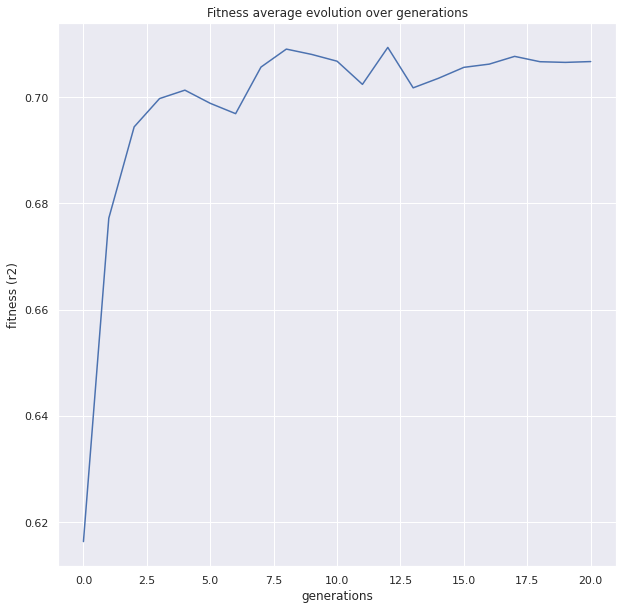

In [9]:
plot = plot_fitness_evolution(evolved_estimator, metric="fitness")
plt.show()

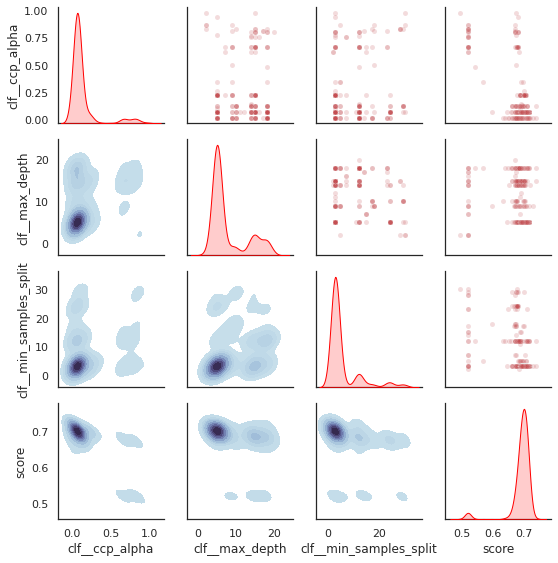

In [10]:
plot_search_space(evolved_estimator)
plt.show()